In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
customer_data = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')



### Summarize transaction data for clustering




In [11]:
tx_summary = transactions.groupby("CustomerID").agg({
    "TotalValue": "sum",  # Total spend
    "TransactionID": "count"  # Transaction frequency
}).rename(columns={"TotalValue": "TotalSpend", "TransactionID": "TransactionCount"})


### Merge transaction summary with customer data



In [14]:
customer_data = customer_data.merge(tx_summary, on="CustomerID", how="left")
customer_data.fillna(0, inplace=True)


### Select features for clustering


In [19]:
features = [ "TotalSpend", "TransactionCount"]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[features])


### Perform Clustering
### Determine the optimal number of clusters using the Elbow Method


In [40]:
import os


In [42]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

C:\Users\Priyanka Behera\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Priyanka Behera\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Priyanka Behera\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Priyanka Behera\AppData\Roaming\Python\P

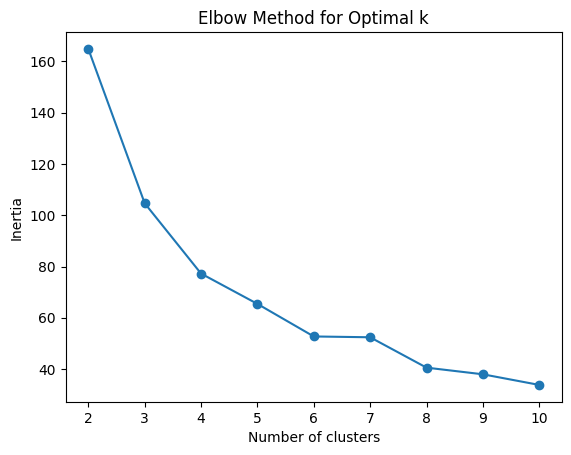

In [46]:

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [50]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(scaled_features)


C:\Users\Priyanka Behera\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [53]:
db_index = davies_bouldin_score(scaled_features, customer_data["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.7963338823953641


In [55]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
customer_data["PCA1"] = pca_features[:, 0]
customer_data["PCA2"] = pca_features[:, 1]

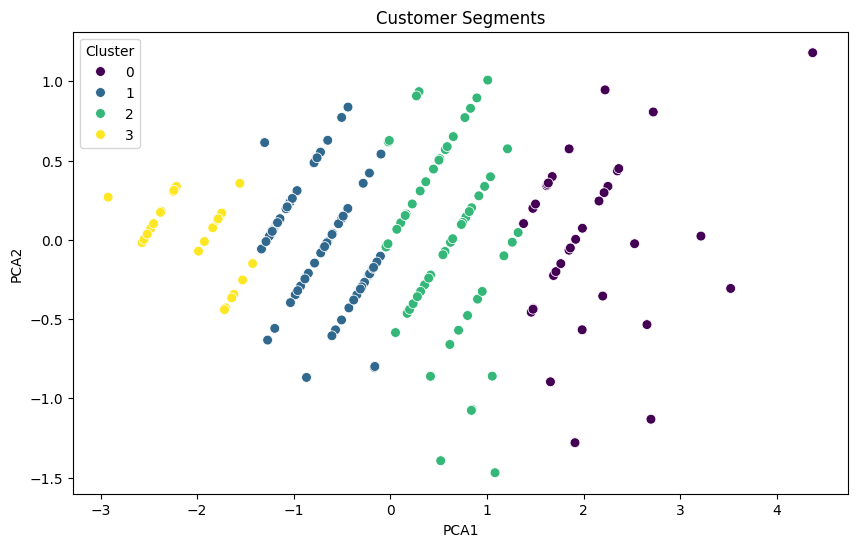

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="Cluster", data=customer_data,
    palette="viridis", s=50
)
plt.title("Customer Segments")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

In [59]:
customer_data.to_csv("Customer_Segments.csv", index=False)
print("Customer segmentation results saved to Customer_Segments.csv.")


Customer segmentation results saved to Customer_Segments.csv.
